<font size=13> CNN Classifier multiple classes 

In [5]:
import numpy as np
import tensorflow as tf
import os
from matplotlib import pyplot as plt
import pandas as pd
import re
from PIL import Image
import shutil
import csv
import tempfile
from collections import Counter


In [3]:
!find . -name ".DS_Store" -print -delete





In [8]:
class_names = ['healthy', 'ACL only', 'Meniscus Only', 'Abnormal Only', 'ACL and Meniscus',
               'Meniscus and Abnormal', 'ACL and Abnormal', 'ACL and Meniscus and Abnormal']
nClasses = len(class_names)
print("Num classes:", nClasses)

Num classes: 8


<font size=5> Load Data (unbalanced)

In [262]:
#multi class labels:
    #0 = healthy
    #1 = acl tear ONLYa
    #2 = meniscus tear ONLY
    #3 = abnormal ONLY
    #4 = acl & meniscus 
    #5 = meniscus & abnormal
    #6 = acl & abnormal
    #7 = acl & meniscus & abnormal
    



#training images
train_folder_path_images = 'MRNet-v1.0/train_4x4_cropped/rgb_stacks_4x4_cropped'  # Update this with the path to your folder containing .npy files
train_images = sorted(os.listdir(train_folder_path_images))
train_nImages = len(train_images)
print("Num Images train:",train_nImages)

# im = Image.open(train_images[0])
# image_size = im1.size
# print(image_size)


#training labels        
train_labels = np.loadtxt("MRNet-v1.0/train-MRI-labels_combined.csv",
                 delimiter=",", dtype=int)
train_labels = list(train_labels)
#ensure the number of labels matches the number of imag
train_labelsCropped = train_labels[:train_nImages]
print("Num labels train:", len(train_labelsCropped))


print("============================")

#validation images
valid_folder_path_images = 'MRNet-v1.0/valid_4x4_cropped/rgb_stacks_4x4_cropped'  # Update this with the path to your folder containing .npy files
valid_images = sorted(os.listdir(valid_folder_path_images))
valid_nImages = len(valid_images)
print("Num Images valid:",valid_nImages)

#validation labels     
valid_labels = np.loadtxt("MRNet-v1.0/valid-MRI-labels_combined.csv",
                 delimiter=",", dtype=int)
valid_labels = list(valid_labels)
#ensure the number of labels matches the number of imag
valid_labelsCropped = valid_labels[:valid_nImages]
print("Num labels valid:", len(valid_labelsCropped))



#print label counts, determine if data needs balancing, if so skip all code from now until ################BALANCED###############
labels_counter = Counter(train_labelsCropped)
print("\n\n\Label counts:", labels_counter)

Num classes: 8
Num Images train: 1130
Num labels train: 1130
Num Images valid: 120
Num labels valid: 120


\Label counts: Counter({3: 433, 5: 272, 0: 217, 7: 125, 6: 83})


<font size=5> Balance the dataset (train)

In [263]:

# Assuming labels contain the original labels as ints and images contain the list of image filenames
labels_counter = Counter(train_labelsCropped)
print("train", labels_counter)


# Determine the count of the least common label
min_label_count = min(labels_counter.values())
# print(min_label_count)

balanced_labels = []
balanced_images = []
for label, image in zip(train_labelsCropped, train_images):
    # print(image, label)
    bal_labels_counter = Counter(balanced_labels)
    if bal_labels_counter[label] <= min_label_count:

        balanced_labels.append(label)
        balanced_images.append(image)
   

train Counter({3: 433, 5: 272, 0: 217, 7: 125, 6: 83})


In [264]:
#save balanced dataset images and labels to folder:
folder_path = 'MRNet-v1.0/train_4x4_cropped'

#Step 2 get current path and create new folder to save data in current path
balanced_images_path = os.path.join(os.getcwd(), folder_path, 'balanced_multi_class_rgb_stacks')

if not os.path.exists(balanced_images_path): 
    os.makedirs(balanced_images_path)
    


# Assuming the files are in the current directory, copy balanced images to new folder
for file_name in balanced_images:
    # Replace 'path_to_your_files_folder' with the path to your original files
    file_path = os.path.join(train_folder_path_images, file_name)
    shutil.copy(file_path, balanced_images_path)    
    
# Name for the CSV file
if not os.path.exists('balanced_labels_multi_class_train.csv'): 
    np.savetxt('balanced_labels_multi_class_train.csv', balanced_labels, delimiter=",", fmt = '%d')
print("Saved csv:", csv_name, "in path", os.getcwd())


print("\n\n this path will be the path to the balanced images", balanced_images_path)

Saved csv: balanced_labels_multi_class.csv in path /Users/danielsloseris/Desktop/CMPT 340/Project/ImageClassification


 this path will be the path to the balanced images /Users/danielsloseris/Desktop/CMPT 340/Project/ImageClassification/MRNet-v1.0/train_4x4_cropped/balanced_multi_class_rgb_stacks


In [220]:
# print(balanced_images,balanced_labels)
# print("Balanced label counts:", Counter(balanced_labels)) 

<font size=5> Balance the dataset (valid)

In [265]:

# Assuming labels contain the original labels as ints and images contain the list of image filenames
labels_counter = Counter(valid_labelsCropped)
print("valid", labels_counter)


# Determine the count of the least common label
min_label_count = min(labels_counter.values())
# print(min_label_count)

balanced_labels = []
balanced_images = []
for label, image in zip(valid_labelsCropped, valid_images):
    # print(image, label)
    bal_labels_counter = Counter(balanced_labels)
    if bal_labels_counter[label] <= min_label_count:

        balanced_labels.append(label)
        balanced_images.append(image)
   

valid Counter({7: 31, 0: 25, 6: 23, 5: 21, 3: 20})


In [266]:
#save balanced dataset images and labels to folder:
folder_path = 'MRNet-v1.0/valid_4x4_cropped'

#Step 2 get current path and create new folder to save data in current path
balanced_images_path = os.path.join(os.getcwd(), folder_path, 'balanced_multi_class_rgb_stacks')

if not os.path.exists(balanced_images_path): 
    os.makedirs(balanced_images_path)
    


# Assuming the files are in the current directory, copy balanced images to new folder
for file_name in balanced_images:
    # Replace 'path_to_your_files_folder' with the path to your original files
    file_path = os.path.join(valid_folder_path_images, file_name)
    shutil.copy(file_path, balanced_images_path)    
  
# Name for the CSV file
if not os.path.exists('balanced_labels_multi_class_val.csv'): 
    np.savetxt('balanced_labels_multi_class_val.csv', balanced_labels, delimiter=",", fmt = '%d')
print("Saved csv:", csv_name, "in path", os.getcwd())


print("\n\n this path will be the path to the balanced images", balanced_images_path)

Saved csv: balanced_labels_multi_class.csv in path /Users/danielsloseris/Desktop/CMPT 340/Project/ImageClassification


 this path will be the path to the balanced images /Users/danielsloseris/Desktop/CMPT 340/Project/ImageClassification/MRNet-v1.0/valid_4x4_cropped/balanced_multi_class_rgb_stacks


In [223]:
# print(balanced_images,balanced_labels)
# print("Balanced label counts:", Counter(balanced_labels)) 
###############BALANCED###############

<font size=5> Load balanced dataset

In [6]:
#training
train_folder_path_images = 'MRNet-v1.0/train_4x4_cropped/balanced_multi_class_rgb_stacks'
train_images = sorted(os.listdir(train_folder_path_images))
train_nImages = len(train_images)
print("Num Images train:",train_nImages)

train_labels = np.loadtxt("MRNet-v1.0/train_4x4_cropped/balanced_labels_multi_class_train.csv",
                 delimiter=",", dtype=int)
train_labels = list(train_labels)
train_labelsCropped = train_labels[:train_nImages]
print("Num labels train:", len(train_labelsCropped))
labels_counter = Counter(train_labelsCropped)
print("train", labels_counter)


#validation
valid_folder_path_images = 'MRNet-v1.0/valid_4x4_cropped/balanced_multi_class_rgb_stacks'
valid_labels = np.loadtxt("MRNet-v1.0/valid_4x4_cropped/balanced_labels_multi_class_val.csv",
                 delimiter=",", dtype=int)
valid_images = sorted(os.listdir(valid_folder_path_images))
valid_nImages = len(valid_images)
print("Num Images valid:",valid_nImages)


valid_labels = list(valid_labels)
valid_labelsCropped = valid_labels[:valid_nImages]
print("Num labels valid:", len(valid_labelsCropped))
labels_counter = Counter(valid_labelsCropped)
print("valid", labels_counter)

Num Images train: 419
Num labels train: 419
train Counter({3: 84, 7: 84, 5: 84, 0: 84, 6: 83})
Num Images valid: 104
Num labels valid: 104
valid Counter({0: 21, 7: 21, 6: 21, 5: 21, 3: 20})


<font size=5> Create tensorflow dataset

Found 419 files belonging to 5 classes.
Validation:
Found 104 files belonging to 5 classes.
------BATCH SHAPE TRAINING-----
train_Images (batch[0]) shape: (32, 512, 512, 3)
train_Labels (batch[1]): [7 6 5 0 6 3 6 7 0 6 6 0 7 6 7 6 7 0 0 7 3 3 6 7 7 5 3 5 3 5 5 0]
------BATCH SHAPE VALIDATION-----
valid_Images (batch[0]) shape: (32, 512, 512, 3)
valid_Labels (batch[1]): [3 5 7 0 3 0 0 7 6 5 3 3 0 0 5 6 0 6 6 5 7 5 5 6 7 6 3 7 6 7 0 5]


==============Sample Training Images=============



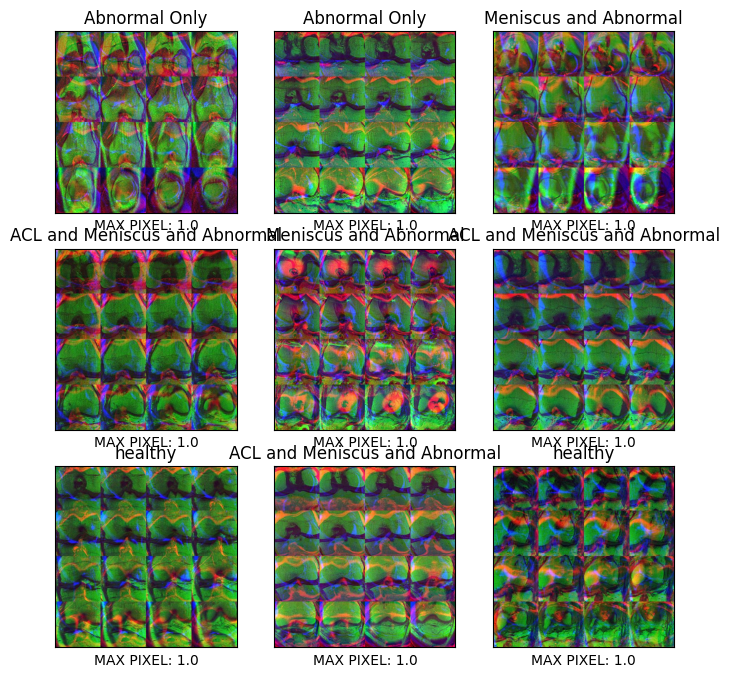



==============Sample Validation Images=============



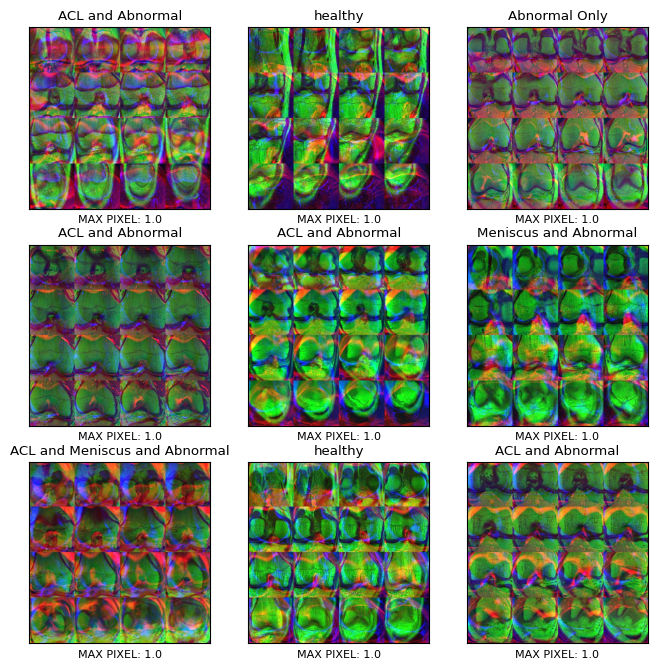

{6: 83, 0: 84, 5: 84, 3: 84, 7: 84}


In [9]:






#create tensorflow dataset, specifying labels TRAINING
train_data = tf.keras.utils.image_dataset_from_directory(train_folder_path_images, 
                                                         shuffle=True, 
                                                         labels=train_labelsCropped, 
                                                         image_size=(512,512), 
                                                         label_mode="int")
#scale data to 0-1 instead of 0-255
train_data = train_data.map(lambda imgs, labels: (imgs/255, labels)) #x will be images, y will be labels
train_data_iterator = train_data.as_numpy_iterator() #create an iterator to access data
train_batch = train_data_iterator.next() #grabs a batch of data

print("Validation:")
#create tensorflow dataset, specifying labels VALIDATION
valid_data = tf.keras.utils.image_dataset_from_directory(valid_folder_path_images, 
                                                         shuffle=True, 
                                                         labels=valid_labelsCropped, 
                                                         image_size=(512,512), 
                                                         label_mode="int")
#scale data to 0-1 instead of 0-255
valid_data = valid_data.map(lambda imgs, labels: (imgs/255, labels)) #x will be images, y will be labels
valid_data_iterator = valid_data.as_numpy_iterator() #create an iterator to access data
valid_batch = valid_data_iterator.next() #grabs a batch of data


print("------BATCH SHAPE TRAINING-----")
print("train_Images (batch[0]) shape:",train_batch[0].shape) #batch[0] has images, batch[1] has labels
print("train_Labels (batch[1]):",train_batch[1])

print("------BATCH SHAPE VALIDATION-----")
print("valid_Images (batch[0]) shape:",valid_batch[0].shape) #batch[0] has images, batch[1] has labels
print("valid_Labels (batch[1]):",valid_batch[1])

img_height = len(train_batch[0][1])
img_width = len(train_batch[0][2])




#take a look at some images
print("\n\n==============Sample Training Images=============\n")
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # print(train_labelsCropped[i])
    plt.imshow(train_batch[0][i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel("MAX PIXEL: " + str(train_batch[0][i].max()))
    # plt.title("Img"+ str(i).zfill(4) +" "+ class_names[train_labelsCropped[i]])
    plt.title(class_names[train_labelsCropped[i]])
plt.show()
plt.rcParams.update({'font.size': 8})

print("\n\n==============Sample Validation Images=============\n")
plt.figure(figsize=(8,8))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    # print(train_labelsCropped[i])
    plt.imshow(valid_batch[0][i])
    # The CIFAR labels happen to be arrays, 
    # which is why you need the extra index
    plt.xlabel("MAX PIXEL: " + str(valid_batch[0][i].max()))
    # plt.title("Img"+ str(i).zfill(4) +" "+ class_names[valid_labelsCropped[i]])
    plt.title(class_names[valid_labelsCropped[i]])

plt.show()
plt.rcParams.update({'font.size': 8})


#print class counts:
class_counts = {}
for _, labels in train_data:
    for label in labels.numpy():
        if label in class_counts:
            class_counts[label] += 1
        else:
            class_counts[label] = 1

print(class_counts)


<font size=5> Help improve performance for larger datasets
    


In [10]:
AUTOTUNE = tf.data.AUTOTUNE

train_data = train_data.cache().prefetch(buffer_size=AUTOTUNE)
valid_data = valid_data.cache().prefetch(buffer_size=AUTOTUNE)

#https://www.tensorflow.org/tutorials/images/classification

#data_augmentation to help model
data_augmentation = tf.keras.Sequential(
  [
    tf.keras.layers.RandomFlip("horizontal",
                      input_shape=(img_height,
                                  img_width,
                                  3)),
    tf.keras.layers.RandomRotation(0.1),
    tf.keras.layers.RandomZoom(0.1),
  ]
)


#visualize the augmented images
# plt.figure(figsize=(10, 10))
# for images, _ in train_data.take(1):
#   for i in range(9):
#     augmented_images = data_augmentation(images)
#     ax = plt.subplot(3, 3, i + 1)
#     plt.imshow(augmented_images[0].numpy())
#     plt.axis("off")

<font size=5> Build model

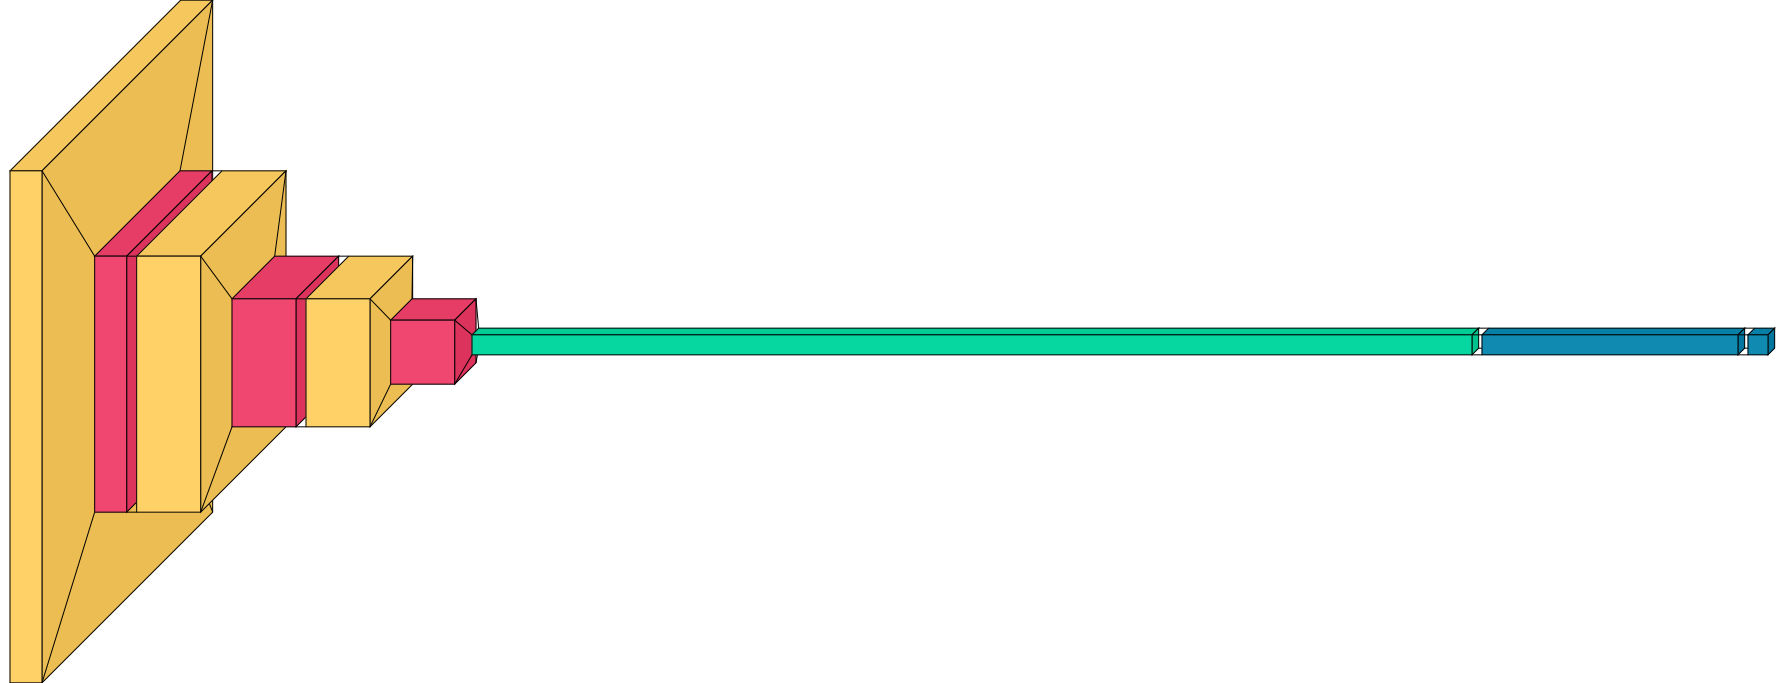

In [17]:
from tensorflow.keras.models import Sequential #functional API exists aswell for fancier stuff
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, GlobalAveragePooling2D
import visualkeras
from PIL import ImageFont
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping
# font = PIL.ImageFont.load_default()


model = Sequential()

# Convolutional layers
# model.add(Conv2D(64, (3, 3), padding='same', activation='relu', kernel_regularizer=l2(0.01)))
model.add(Conv2D(32, (3, 3), padding = 'same', activation='relu', input_shape=(512, 512, 3), kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding = 'same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding = 'same', activation='relu'))  # Added another Conv2D layer
model.add(MaxPooling2D(pool_size=(2, 2)))

# Flatten the output for Dense layers
model.add(Flatten())

# Dense layers
# model.add(Dense(128, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dense(256, activation='relu'))
# model.add(Dropout(0.5))  # Dropout for regularization
model.add(Dense(nClasses))

early_stopping = EarlyStopping(monitor = 'val_loss',
                               patience =5,
                               verbose=1,
                               restore_best_weights = True)



# font = "arial.ttf"  # You can use a default font or provide the correct font path
from PIL import ImageFont

visualkeras.layered_view(model, scale_xy=1, scale_z=1, max_z=1000)
# @misc{Gavrikov2020VisualKeras,
#   author = {Gavrikov, Paul},
#   title = {visualkeras},
#   year = {2020},
#   publisher = {GitHub},
#   journal = {GitHub repository},
#   howpublished = {\url{https://github.com/paulgavrikov/visualkeras}},
# }

<font size =5> Compile Model

In [18]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import LearningRateScheduler


# Define a function to schedule learning rates (TEST multiple learning rates)
def lr_scheduler(epoch, lr):
    learning_rates = [0.01, 0.005, 0.001, 0.0005, 0.0001]  # Add more learning rates to test
    new_lr = learning_rates[epoch // 5] if epoch < 20 else lr
    return new_lr


num_epochs = 20  # Set your desired number of epochs

# Create an array of epochs
epochs = np.arange(0, num_epochs)

# Calculate the learning rates for each epoch
learning_rates = [lr_scheduler(epoch, 0.001) for epoch in epochs]

# # Plot the scheduled learning rates
# plt.figure(figsize=(8, 6))
# plt.plot(epochs, learning_rates, marker='o', linestyle='-', color='b')
# plt.title('Scheduled Learning Rate vs. Epochs')
# plt.xlabel('Epochs')
# plt.ylabel('Learning Rate')
# plt.grid(True)
# plt.show()



# Create a LearningRateScheduler callback
lr_callback = LearningRateScheduler(lr_scheduler)


#############Create an Adam optimizer with a custom learning rate (MANUAL)
custom_learning_rate = 0.0005  # Set your desired learning rate
optimizer = Adam(learning_rate=custom_learning_rate)

# Compile the model with the custom optimizer
model.compile(optimizer=optimizer,
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])



# ############### Create an Adam optimizer with variable (scheduled) learning rates
# optimizer = Adam()
# # Compile the model with the Adam optimizer
# model.compile(optimizer=optimizer,
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])


#############use default adam learning rate etc.
# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy']) 



#for binary classification, can also use metrics like AUC, precision...
# for multiclass check out this link: https://www.tensorflow.org/tfx/model_analysis/metrics



#adam optimizer does not require manual tuning of hyperparameters, we will be using this, 
#hyperparameters could also be tuned automatically https://www.tensorflow.org/decision_forests/tutorials/automatic_tuning_colab


model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_9 (Conv2D)           (None, 512, 512, 32)      896       
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 256, 256, 32)      0         
 g2D)                                                            
                                                                 
 conv2d_10 (Conv2D)          (None, 256, 256, 64)      18496     
                                                                 
 max_pooling2d_10 (MaxPooli  (None, 128, 128, 64)      0         
 ng2D)                                                           
                                                                 
 conv2d_11 (Conv2D)          (None, 128, 128, 64)      36928     
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 64, 64, 64)       

<font size=5> Separate some Training data to make testing data

In [19]:
#use some of the training data as test data: 
print("Len of train data before splitting:", int(len(train_data)))
train_size = int(len(train_data)*.8) #70% for training
test_size = int(len(train_data)*.2) #10% for testing might need to add some batches (+...) because int will round down

print("train_size",train_size)
print("test_size", test_size)

# train_ds_final = train_ds.take(train_size)
# test_ds_final = train_ds.skip(train_size-1).take(test_size) #skips everything already used and taking the rest

train_data_final = train_data.take(train_size)
test_data_final = train_data.skip(train_size)
print("Len of created train_ds_final",len(train_data_final))
print("Len of created test_ds",len(test_data_final))

Len of train data before splitting: 14
train_size 11
test_size 2
Len of created train_ds_final 11
Len of created test_ds 3


<font size=5> Train model

In [277]:

          
          
num_epochs=30
history = model.fit(train_data_final, 
                    callbacks=[early_stopping], 
                    validation_data=valid_data,
                    epochs=num_epochs)

# history = model.fit(
#   train_data_final,
#   validation_data=valid_data,
#   epochs=epochs
# )

Epoch 1/30
11/11 [==============================] - 55s 5s/step - loss: 5.3165 - accuracy: 0.2043 - val_loss: 5.1363 - val_accuracy: 0.2019
Epoch 2/30
11/11 [==============================] - 48s 4s/step - loss: 5.1762 - accuracy: 0.1920 - val_loss: 5.0480 - val_accuracy: 0.2019
Epoch 3/30
11/11 [==============================] - 52s 5s/step - loss: 5.0737 - accuracy: 0.2188 - val_loss: 4.9601 - val_accuracy: 0.2500
Epoch 4/30
11/11 [==============================] - 47s 4s/step - loss: 4.9067 - accuracy: 0.3034 - val_loss: 4.8633 - val_accuracy: 0.3173
Epoch 5/30
11/11 [==============================] - 53s 5s/step - loss: 4.8647 - accuracy: 0.2642 - val_loss: 4.7790 - val_accuracy: 0.2981
Epoch 6/30
11/11 [==============================] - 52s 5s/step - loss: 4.7600 - accuracy: 0.2955 - val_loss: 4.7027 - val_accuracy: 0.3173
Epoch 7/30
11/11 [==============================] - 50s 5s/step - loss: 4.7003 - accuracy: 0.3153 - val_loss: 4.6220 - val_accuracy: 0.3846
Epoch 8/30
11/11 [==

<font size=5> Visualize Training Results

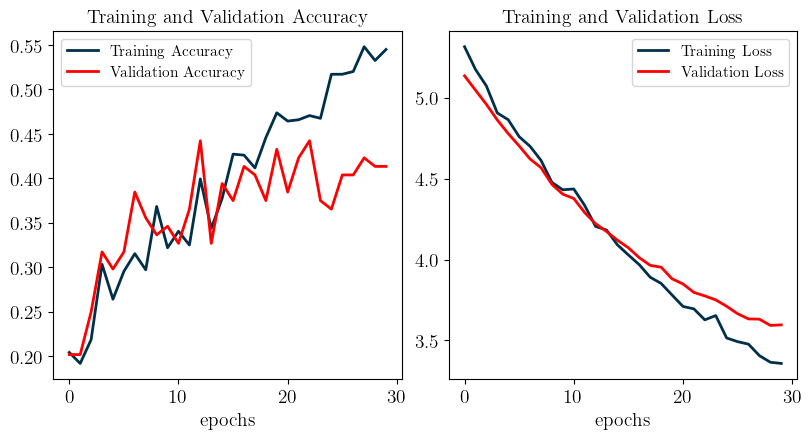

In [278]:
from matplotlib import rc
usetex = True
rc('font', **{'family': 'serif', 'serif': ['Computer Modern']})
rc('text', usetex=True)



acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(num_epochs)

plt.figure(figsize=(8, 8),constrained_layout=True)
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy', linewidth = 2, color='#003049')
plt.plot(epochs_range, val_acc, label='Validation Accuracy', linewidth = 2, color = 'r')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy', fontsize = 14)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.xlabel("epochs", fontsize = 14)
plt.legend(prop={'size': 11})
ax = plt.gca()
# ax.set_aspect('equal', adjustable='box')
ax.set_box_aspect(1)
# plt.axis('scaled')


plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss', linewidth = 2, color='#003049')
plt.plot(epochs_range, val_loss, label='Validation Loss', linewidth = 2, color = 'r')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss', fontsize = 14)
plt.tick_params(axis='x', labelsize=14)
plt.tick_params(axis='y', labelsize=14)
plt.xlabel("epochs", fontsize = 14)
plt.legend(prop={'size': 11})
ax = plt.gca()
ax.set_box_aspect(1)
# ax.set_aspect('equal', adjustable='box')
# plt.axis('scaled')
# plt.tight_layout()
plt.savefig("TrainingAcc and Loss.png", dpi = 500)
plt.show()


# ###########plot learning rate against loss########### for scheduled learning rates!
# plt.plot(learning_rates, loss)
# plt.plot(learning_rates, val_loss)
# plt.savefig("learning Rate v Loss.png", dpi = 500)
# plt.show()


<font size=5> Make a prediction
    

In [245]:
#for multi class model this converts raw model outputs to probabilities of each class
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])
predictions = probability_model.predict(test_data_final)




2/2 [==============================] - 7s 3s/step
[[5.60816471e-03 2.18556625e-06 5.93783298e-05 9.21791885e-04
  1.95480570e-05 3.05044861e-03 3.54620861e-03 9.86792326e-01]
 [1.38721652e-02 1.87882979e-04 1.64269377e-03 2.92994715e-02
  2.61007319e-03 8.62382472e-01 6.77450895e-02 2.22601052e-02]
 [9.81490731e-01 2.84766775e-05 6.24627108e-04 2.03048764e-03
  1.50886175e-04 3.85643472e-03 5.28244115e-03 6.53578062e-03]
 [2.14319900e-02 1.66227212e-04 5.97616658e-04 9.94300097e-03
  4.95773682e-04 2.43227482e-02 3.97669375e-02 9.03275788e-01]
 [1.07266698e-02 4.92569670e-05 5.31533780e-03 8.83628011e-01
  2.40424159e-03 8.87148082e-03 7.95727596e-02 9.43211745e-03]
 [1.25057884e-02 3.21620551e-04 7.83284369e-04 1.16386591e-02
  8.30236415e-04 4.57742512e-02 6.13438971e-02 8.66802275e-01]
 [9.88393366e-01 5.70510201e-06 8.11653445e-05 1.07739404e-04
  2.67036630e-05 1.35782885e-03 1.22435286e-03 8.80309194e-03]
 [2.55487789e-03 1.02709191e-05 2.28963397e-03 9.03644025e-01
  3.87229724e

1/1 [==============================] - 0s 251ms/step


Text(0.5, 1.0, 'ground truth:tf.Tensor(5, shape=(), dtype=int32)pred:[[-0.83229584 -4.962647   -1.9127567   4.580344   -0.4459896   3.7979214\n   3.495293    3.3964462 ]]')

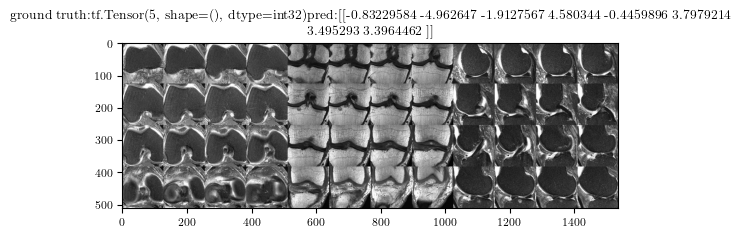

In [254]:
test_batch, test_labels = next(iter(test_data_final))

img_array = tf.keras.utils.img_to_array(test_batch[0])
img_array = tf.expand_dims(img_array, 0)

pred = model.predict(img_array)
plt.imshow(test_batch[0])
plt.title("ground truth:"+ str(test_labels) +  "pred:" + str(np.argmax(pred)) + "val " + str(class_names[np.argmax(pred)]))

1/1 [==============================] - 3s 3s/step
class [6 6 7 0 5 0 5 6 0 3 7 5 7 5 5 0 5 0 7 0 7 6 3 6 0 5 6 0 5 7 3 0]
pred: [5 0 7 6 6 0 5 6 0 6 3 5 7 0 3 0 5 0 5 0 5 6 3 6 5 5 5 0 0 0 0 0]
1/1 [==============================] - 4s 4s/step
class [7 7 3 6 3 0 7 7 3 3 6 6 3 3 6 3 6 0 3 7 0 7 7 5 0 5 0 5 7 3 6 0]
pred: [6 6 6 7 3 3 7 6 0 6 6 6 0 3 5 6 0 5 6 7 7 7 7 5 5 6 0 5 7 0 0 0]
1/1 [==============================] - 4s 4s/step
class [0 6 6 3 0 6 5 6 7 5 6 6 3 5 5 3 5 3 7 5 5 0 6 7 3 6 0 7 0 7 0 5]
pred: [0 7 6 0 6 5 3 5 6 5 6 7 6 6 5 3 5 6 6 3 7 0 0 7 6 5 5 7 0 6 0 5]
1/1 [==============================] - 1s 1s/step
class [5 7 3 7 6 5 3 3]
pred: [5 5 5 3 7 5 0 5]
Precision: 0.897, Recall: 0.843, Accuracy: 0.433, AUC: 0.731
matthews corr-coef: 0.29378174991016204


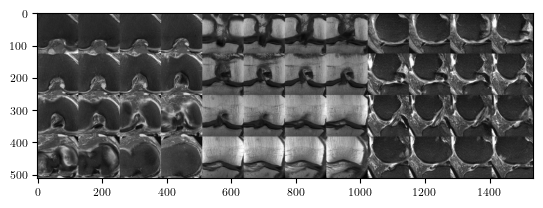

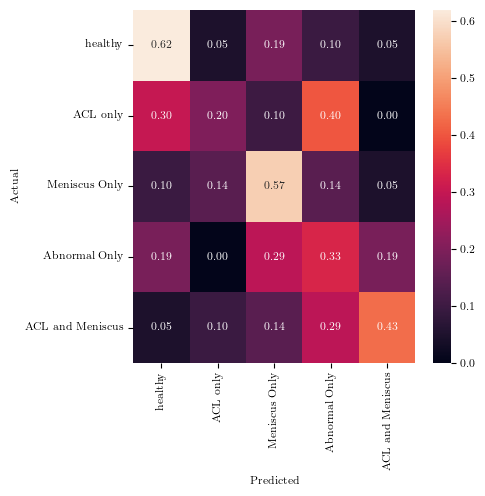

In [258]:
from tensorflow.keras.metrics import Precision, Recall, BinaryAccuracy, AUC, SparseCategoricalAccuracy, CategoricalAccuracy, Accuracy
from sklearn import metrics
import seaborn as sns
pre = Precision()
re = Recall()
# acc = BinaryAccuracy() for binary model (2 classes)
acc = Accuracy() #for multi class model
AUC = AUC()


test_labels_total = np.array([])
model_predictions_total = np.array([])
for batch in iter(valid_data): 
    X, y = batch #X are images, y are labels for the batch
    y = np.array(y)
    test_labels_total = np.concatenate((test_labels_total.astype(int), y.astype(int)))
    
    yhat = probability_model.predict(X)
    yhat = np.argmax(yhat, axis=1)
    
    model_predictions_total = np.concatenate((model_predictions_total.astype(int),yhat.astype(int)))
    print("class",y)
    print("pred:",yhat)
    plt.imshow(X[0])
    pre.update_state(y, yhat)
    re.update_state(y, yhat)
    acc.update_state(y, yhat)
    AUC.update_state(y, yhat)
    
test_labels_total = np.array(test_labels_total)
model_predictions_total = np.array(model_predictions_total)
    
print("Precision: {:.3f}, Recall: {:.3f}, Accuracy: {:.3f}, AUC: {:.3f}".format(pre.result().numpy(), re.result().numpy(), acc.result().numpy(), AUC.result().numpy()))
print("matthews corr-coef:", metrics.matthews_corrcoef(test_labels_total,model_predictions_total))
# print(metrics.classification_report(test_labels_total,model_predictions_total, target_names=class_names))


#generate confusion matrix of entire test classifical 
cm = metrics.confusion_matrix(test_labels_total,model_predictions_total )
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] #can get rid of this line to un-normalize and have counts instead of probability
fig, ax = plt.subplots(figsize=(5,5))
sns.heatmap(cmn, annot=True, fmt='.2f', xticklabels=class_names[:5], yticklabels=class_names[:5])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.tight_layout()
plt.savefig("Heatmap.png", dpi = 500)
plt.show(block=False)







    




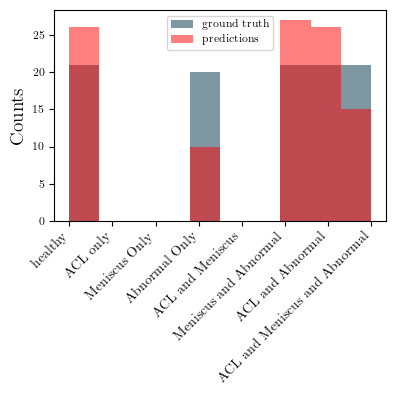

In [259]:
plt.figure(figsize=(4, 4))
plt.hist(valid_labels, label='ground truth', alpha=0.5, color = '#003049')
plt.hist(model_predictions_total, label='predictions', alpha=0.5, color = 'r')
plt.ylabel('Counts', fontsize=14)

# Assuming class_names[:5] contains the labels for ticks
plt.xticks(range(len(class_names)), class_names, rotation=45, ha='right', fontsize=10)  # Rotating the labels by 45 degrees

plt.legend()
plt.tight_layout()
plt.savefig("histogram valid data.png", dpi = 500)



32
1/1 [==============================] - 0s 157ms/step
[[5.6081405e-03 2.1855831e-06 5.9377933e-05 9.2179014e-04 1.9547926e-05
  3.0504542e-03 3.5462254e-03 9.8679233e-01]] arg max: 7
1/1 [==============================] - 0s 146ms/step
[[1.3872411e-02 1.8788569e-04 1.6427292e-03 2.9299801e-02 2.6101009e-03
  8.6238092e-01 6.7745723e-02 2.2260362e-02]] arg max: 5
1/1 [==============================] - 0s 141ms/step
[[9.8149037e-01 2.8477672e-05 6.2464445e-04 2.0305188e-03 1.5089045e-04
  3.8564994e-03 5.2825576e-03 6.5359031e-03]] arg max: 0
1/1 [==============================] - 0s 143ms/step
[[2.1432098e-02 1.6622891e-04 5.9761538e-04 9.9429553e-03 4.9577310e-04
  2.4322862e-02 3.9766975e-02 9.0327555e-01]] arg max: 7
1/1 [==============================] - 0s 140ms/step
[[1.0726631e-02 4.9256152e-05 5.3153015e-03 8.8362861e-01 2.4042295e-03
  8.8713560e-03 7.9572529e-02 9.4320746e-03]] arg max: 3
1/1 [==============================] - 0s 139ms/step
[[1.2505708e-02 3.2161819e-04 7.83

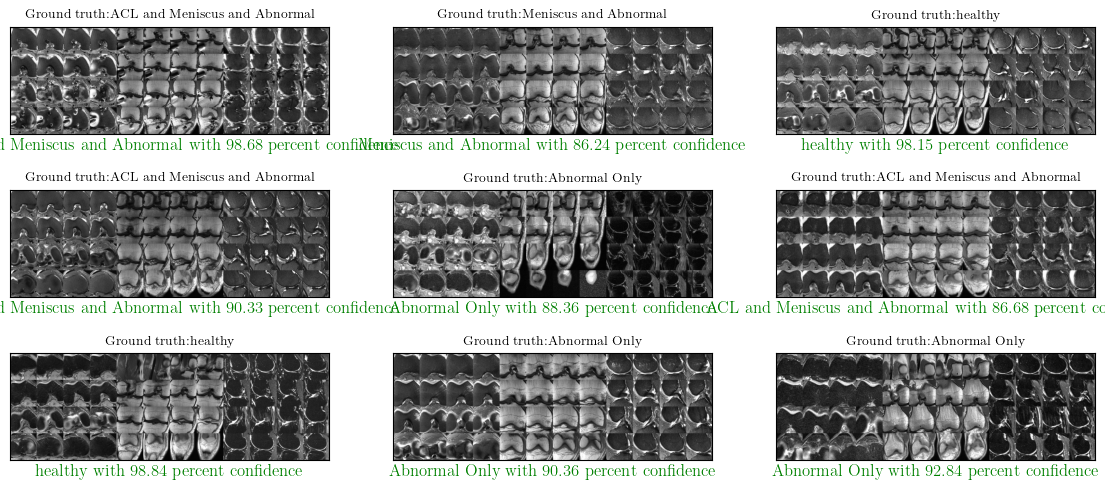

In [257]:
#plot some example images and classifications from a batch
test_image_batch, test_labels_batch = next(iter(test_data_final))

print(len(test_image_batch))
test_labels_batch = np.array(test_labels_batch)
prediction = probability_model.predict(test_image_batch)
plt.figure(figsize=(14, 6))
for i in range(9):
    plt.subplot(3,3,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(test_image_batch[i].numpy())
    img_array = tf.keras.utils.img_to_array(test_image_batch[i])
    img_array = tf.expand_dims(img_array, 0)
    prediction = probability_model.predict(img_array)# Create a batch
    print(str(prediction) + " arg max: " + str(np.argmax(prediction)))
    plt.title("Ground truth:" + str(class_names[test_labels_batch[i]]))
    if class_names[test_labels_batch[i]] == class_names[np.argmax(prediction)]:
        plt.xlabel(str(class_names[np.argmax(prediction)]) + " with {:.2f} percent confidence".format(100 * np.max(prediction)), color = 'g', fontsize = 12)
    else:
        plt.xlabel(str(class_names[np.argmax(prediction)]) + " with {:.2f} percent confidence".format(100 * np.max(prediction)), color = 'r', fontsize = 12)
    
    

In [61]:
model.save(os.path.join('models','multi-class-classifier-230-training-images.h5'))